In [1]:
#TRABAJO PRACTICO MATEMATICA 3
#SEBASTIAN RODRIGUEZ
#DNI: 39269394

In [2]:
#imports y ignora warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [3]:
def resolver_ruta(ruta_relativa):
    if hasattr(sys, '_MEIPASS'):
        return os.path.join(sys._MEIPASS, ruta_relativa)
    return os.path.join(os.path.abspath('.'), ruta_relativa)

In [4]:
dataset = pd.read_csv(resolver_ruta('seguro.csv'))

print('Dimensiones del data set: ' + str(dataset.shape))

print('\nSus primeras filas en modo de ejemplo: \n' + str(dataset.head()))

print('\nLas variables a analizar seran la edad, el bmi, la region y la cantidad de hijos')
labelencoder = LabelEncoder()
variables_a_analizar = dataset[['age', 'bmi', 'region', 'children']]

print('\nA la region se la transforma para poder ser analizada')
variables_a_analizar['region'] = labelencoder.fit_transform(variables_a_analizar['region'])

print('Ejemplo de como quedaria northeast: ' + str(variables_a_analizar['region'][10]))
print('Ejemplo de como quedaria northwest: ' + str(variables_a_analizar['region'][3]))
print('Ejemplo de como quedaria southeast: ' + str(variables_a_analizar['region'][1]))
print('Ejemplo de como quedaria southwest: ' + str(variables_a_analizar['region'][0]))

print('\nA modo de analisis: \n' + str(variables_a_analizar.describe()))

print('\nCon esto podemos ver estos datos que nos seran muy utiles como: ')
print('La edad minima es 18 años y que la maxima es 64')
print('El ibm minimo es 6 y el maximo es 53')
print('La cantidad de hijos minima es 0 y la maxima 5')


print('\n\nNuestra variable a la cual se le contrastaran las variables anteriores sera charges')
variable_de_contraste = dataset[['charges']]

print('\nA modo de analisis: \n' + str(variable_de_contraste.describe()))

print('\nCon esto podemos ver estos datos que nos seran muy utiles como: ')
print('El 50% de los datos estan por abajo de los 10.000')
print('El minimo es 1121')

print("\nPor ultimo puedo notar que todas las variables dieron un count de 1338, para corroborar que no hay ningun NaN puedo hacer: \n" + str(dataset.isnull().any()))


Dimensiones del data set: (1338, 7)

Sus primeras filas en modo de ejemplo: 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Las variables a analizar seran la edad, el bmi, la region y la cantidad de hijos

A la region se la transforma para poder ser analizada
Ejemplo de como quedaria northeast: 0
Ejemplo de como quedaria northwest: 1
Ejemplo de como quedaria southeast: 2
Ejemplo de como quedaria southwest: 3

A modo de analisis: 
               age          bmi       region     children
count  1338.000000  1338.000000  1338.000000  1338.000000
mean     39.207025    30.663397     1.515695     1.094918
std      14.049960     6.098187     1.104885     1.205

Chequeo donde esta la mayor concentracion de datos en charges por si eventualmente requiero hacer un corte

Esto junto a los datos anteriores me permite determinar que si analiso entre 0 y 16000 estoy abarcando la mayor parte de los datos


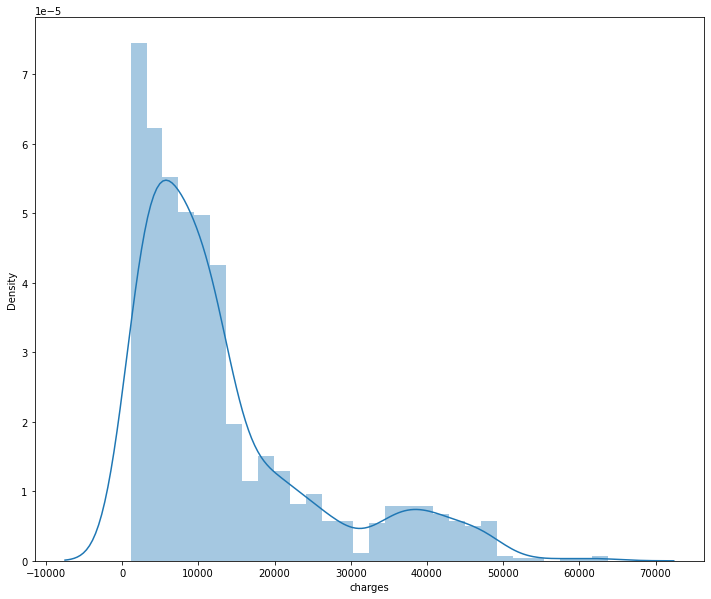

In [5]:
print("Chequeo donde esta la mayor concentracion de datos en charges por si eventualmente requiero hacer un corte")
plt.figure(figsize=(12,10))
plt.tight_layout()
seabornInstance.distplot(variable_de_contraste['charges'])

print("\nEsto junto a los datos anteriores me permite determinar que si analiso entre 0 y 16000 estoy abarcando la mayor parte de los datos")



Armo un dataset para evaluar age con charges
Filtro y me quedo con los varlores menores a 16000
Gráfico


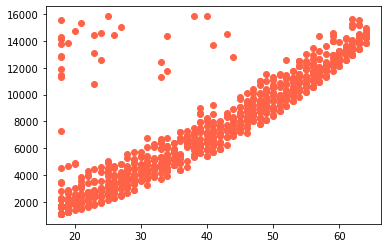

In [6]:
print("\nArmo un dataset para evaluar age con charges")
variables_filtrada = dataset[['age', 'charges']]

print("Filtro y me quedo con los varlores menores a 16000")
variables_filtrada = variables_filtrada.query('charges<=16000')

print("Gráfico")
plt.scatter(variables_filtrada['age'], variables_filtrada['charges'], color = "#FF6347")
plt.show()

In [7]:

print("Dividimos los datos en conjunto de entrenamiento y conjunto de test")
age_entrenado, age_test, charges_entrenado, charges_test = train_test_split(variables_filtrada[['age']], variables_filtrada['charges'], test_size=0.2, random_state=0)

print("\nAge_entrenado escalado: \n", age_entrenado.head())
print("\nAge_test escalado: \n", age_test.head())
print("\nCharges_entrenado escalado: \n", charges_entrenado.head())
print("\nCharges_test escalado: \n", charges_test.head())

print("\nEntrenamos dichos datos")
regressor = LinearRegression()
regressor.fit(age_entrenado, charges_entrenado)

print("\nPredecimos datos")
charges_test_predichos = regressor.predict(age_test)
charges_entrenados_predichos = regressor.predict(age_entrenado)

print("\nMuestro los datos:")
df = pd.DataFrame({'Charges_test': charges_test, 'Charges_predichos': charges_test_predichos.flatten()})
print(df)


Dividimos los datos en conjunto de entrenamiento y conjunto de test

Age_entrenado escalado: 
       age
1200   37
1178   23
163    32
904    60
51     21

Age_test escalado: 
       age
1102   29
963    46
43     37
861    38
507    21

Charges_entrenado escalado: 
 1200     6198.75180
1178     2899.48935
163      5152.13400
904     12644.58900
51       3579.82870
Name: charges, dtype: float64

Charges_test escalado: 
 1102    3471.40960
963     9500.57305
43      6313.75900
861     7151.09200
507     3077.09550
Name: charges, dtype: float64

Entrenamos dichos datos

Predecimos datos

Muestro los datos:
      Charges_test  Charges_predichos
1102    3471.40960        4792.870190
963     9500.57305        8947.310747
43      6313.75900        6747.901041
861     7151.09200        6992.279897
507     3077.09550        2837.839340
...            ...                ...
798    11848.14100       11879.857023
352     3554.20300        5037.249046
370    13415.03810       12612.993592
574    1


Grafico los charges test y predichos para ver si se correlacionean:


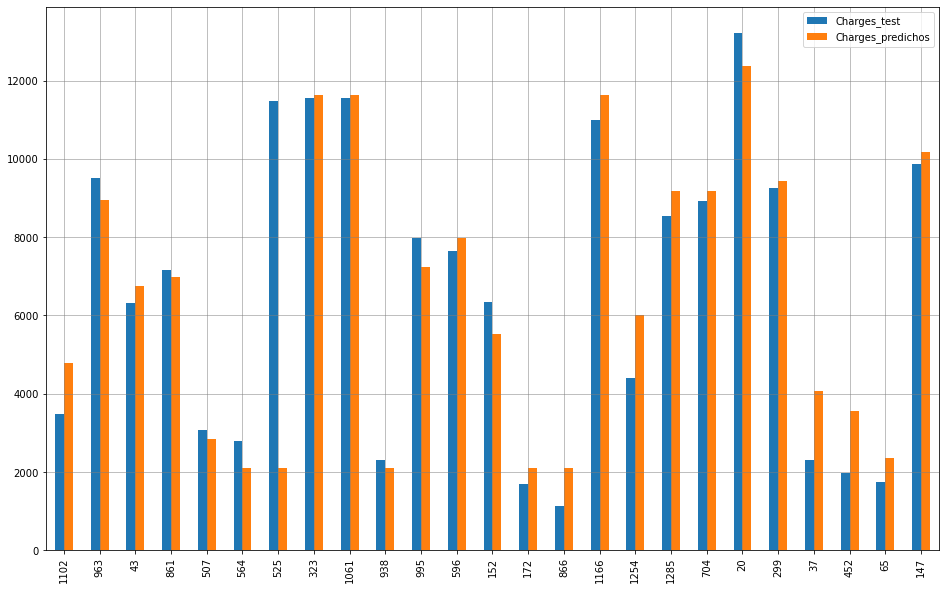

In [8]:
print("\nGrafico los charges test y predichos para ver si se correlacionean:")
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

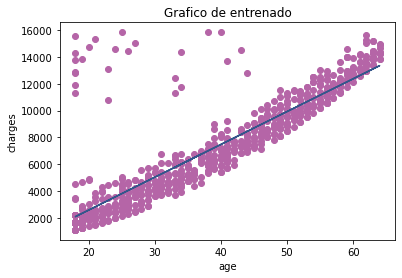

In [9]:
plt.scatter(age_entrenado, charges_entrenado, color = "#B565A7")
plt.plot(age_entrenado, regressor.predict(age_entrenado), color = "#34568B")
plt.title("Grafico de entrenado")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

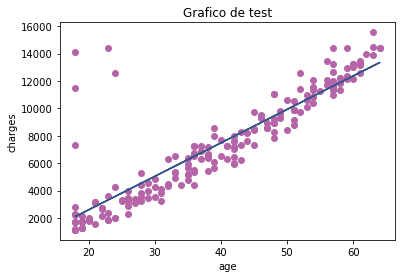

In [10]:
plt.scatter(age_test, charges_test, color = "#B565A7")
plt.plot(age_entrenado, regressor.predict(age_entrenado), color = "#34568B")
plt.title("Grafico de test")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

In [11]:
print("Error Medio Absoluto (MAE): ", metrics.mean_absolute_error(charges_test, charges_test_predichos))
print("Error cuadrático medio (MSE): ", metrics.mean_squared_error(charges_test, charges_test_predichos))
print("Raíz cuadrada del error cuadrático medio (RMSE): ", np.sqrt(metrics.mean_squared_error(charges_test, charges_test_predichos)))

Error Medio Absoluto (MAE):  983.3254810925166
Error cuadrático medio (MSE):  3203593.171695644
Raíz cuadrada del error cuadrático medio (RMSE):  1789.85842224899


In [12]:
print("Se puede observar como a medida que la edad aumenta los costos de seguro tambien aumentan")

print("Esto teniendo en cuenta el corte que realizamos a los costos mayores a 16000, ya que sin ese corte el grafico nos habria dado algo completamente distinto y no podriamos asumir que los cargos solo aumentan a razon de la edad")

print("Por ultimo como vimos mas arriba se puede ver como el conjunto entrenado y el conjunto de test se correlacionany como los modelos de prediccion que realizamos se tienen sentido frente a nuestro modelo obtenido")


Se puede observar como a medida que la edad aumenta los costos de seguro tambien aumentan
Esto teniendo en cuenta el corte que realizamos a los costos mayores a 16000, ya que sin ese corte el grafico nos habria dado algo completamente distinto y no podriamos asumir que los cargos solo aumentan a razon de la edad
Por ultimo como vimos mas arriba se puede ver como el conjunto entrenado y el conjunto de test se correlacionany como los modelos de prediccion que realizamos se tienen sentido frente a nuestro modelo obtenido
